# Insurance Clain Analysis


## Data Assement

### Dirty Data
* Missing values in age and smoker column
* 4 people have blood pressure 140
* A person with claim 63000

### Messy Data
* A person with bmi 153.1 in row index 9

### Automatic Assement

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance_data.csv')

In [6]:
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [3]:
# Check description of Data
df.describe()

,index,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


### Data Cleaning

In [3]:
# Remove index column

df_copy = df.copy()
df_copy.drop(['index', 'PatientID'], axis=1, inplace = True)

## EDA

* Univariate Analysis
* Bivariate Analysis
* Multivariate Analysis

## Univaeiate Analysis

**Age Column**

In [40]:
df_copy['age'].describe()

count    1335.000000
mean       38.078652
std        11.102924
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

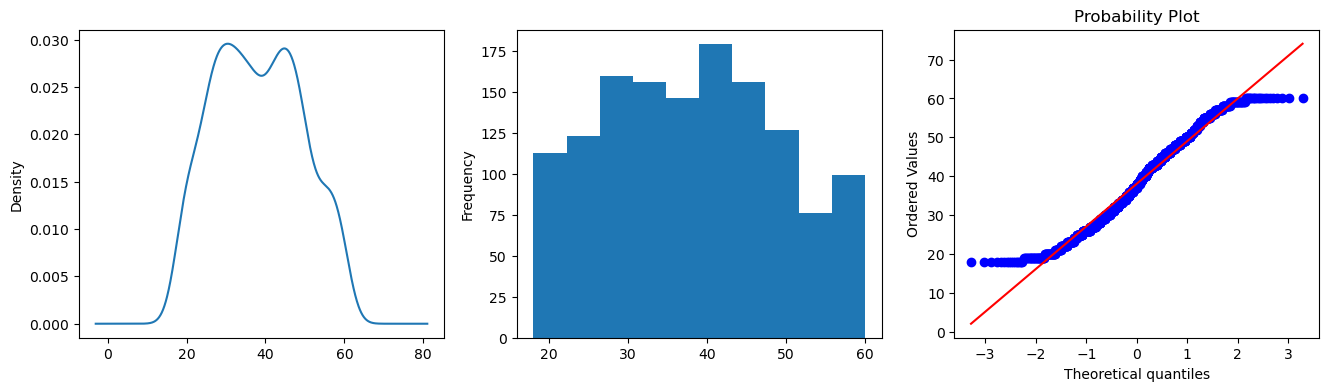

In [68]:
fig, axe = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

df_copy['age'].plot.kde(ax=axe[0])
df_copy['age'].plot.hist(bins=10,ax=axe[1])
stats.probplot(df_copy['age'].dropna(), plot=axe[2])
plt.show()

<Axes: xlabel='age'>

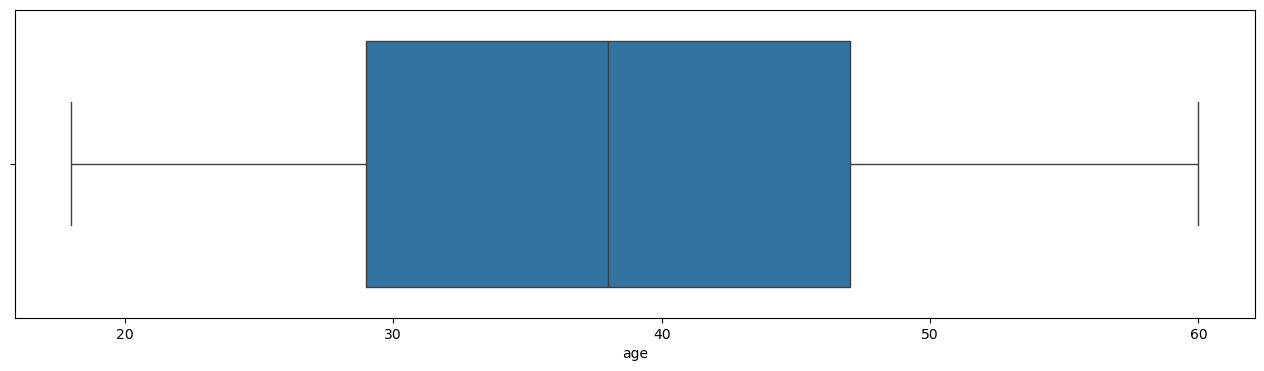

In [77]:
plt.figure(figsize=(16, 4))
sns.boxplot(df_copy['age'], orient='h')

In [69]:
# Skewness of Data
df_copy['age'].skew()

0.11361133741072633

In [70]:
# Kurtosis
df_copy['age'].kurtosis()

-0.9470236326886194

In [73]:
# Shapiro wilk test`

stats.shapiro(df_copy['age'].dropna())

ShapiroResult(statistic=0.97290204426519, pvalue=3.9053977494437485e-15)

Observations
* Data is not normally distributed
* Does't have any ouliers

**Gende Column**

In [8]:
# Check for frequency count of male and female
df_copy['gender'].value_counts()

gender
male      678
female    662
Name: count, dtype: int64

<Axes: ylabel='count'>

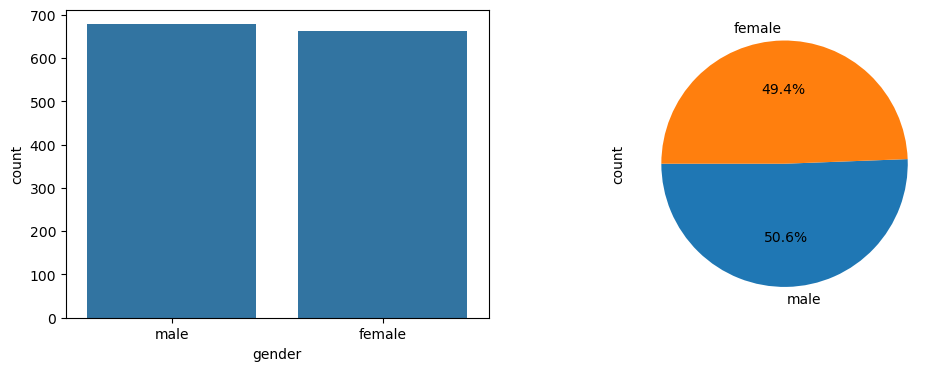

In [22]:
# Bar graph and pie chart of gender column
fig, axe = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.barplot(df_copy['gender'].value_counts(), ax=axe[0])
df_copy['gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=180)

Observations
* Male and female are almost equally distributed
* Mode value = Male

**Column bmi**

In [23]:
df_copy['bmi'].describe()

count    1340.000000
mean       30.668955
std         6.106735
min        16.000000
25%        26.275000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

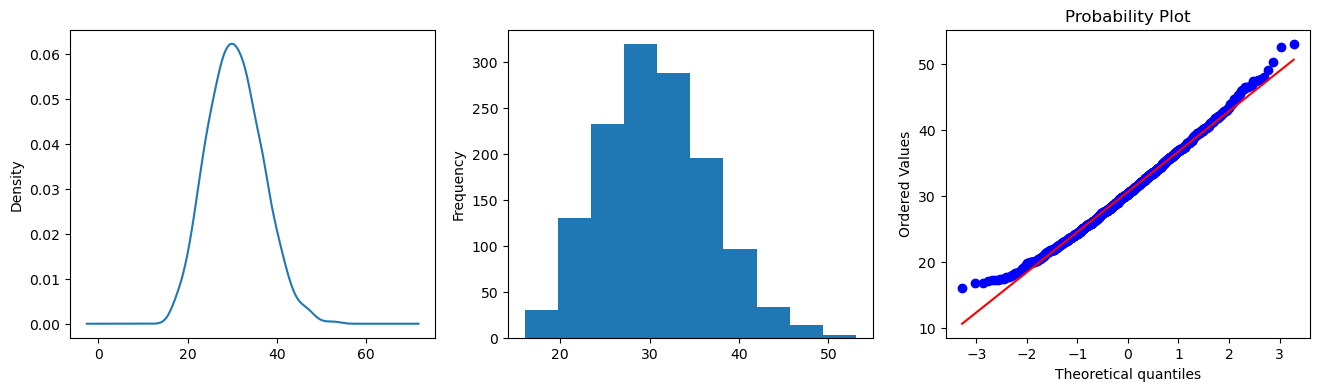

In [25]:
# Density, histogram and qq plot of bmi (Body mass index)

fig, axe = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

df_copy['bmi'].plot.kde(ax=axe[0])
df_copy['bmi'].plot.hist(bins=10,ax=axe[1])
stats.probplot(df_copy['bmi'].dropna(), plot=axe[2])
plt.show()

<Axes: xlabel='bmi'>

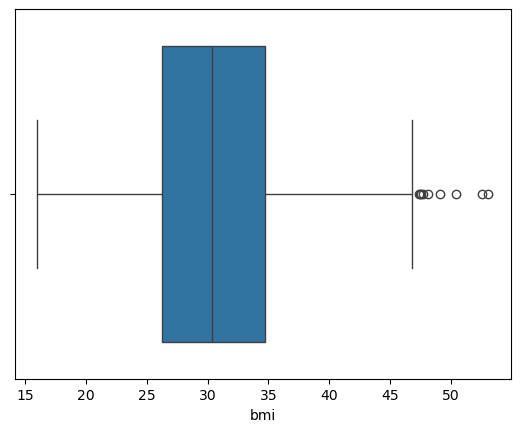

In [52]:
IQR = np.percentile(df_copy['bmi'].dropna(), 75) - np.percentile(df_copy['bmi'].dropna(), 25) 
lower_range = np.percentile(df_copy['bmi'].dropna(), 25) - 1.5*IQR
upper_range = np.percentile(df_copy['bmi'].dropna(), 75) + 1.5*IQR
outliers_percentage = (df_copy[(df_copy['bmi'] < lower_range) | (df_copy['bmi'] > upper_range)].shape[0]/df_copy.shape[0])*100


sns.boxplot(df_copy['bmi'], orient='h')

In [38]:
# Check skewness of bmi
df_copy['bmi'].skew() # Clsoe to normal distribution

0.28597245020808587

In [40]:
# Check Kurtosis of bmi
df_copy['bmi'].kurtosis() # very close to normal distribution 

-0.060200212623761296

In [53]:
# hypothesis testing, Shapiro wilk test, for normality assumptin

stats.shapiro(df_copy['bmi'])

ShapiroResult(statistic=0.9937525429832744, pvalue=2.0306094226607333e-05)

Observations
* The shape of data is symatrical, still it failed the shapiro wilk test which suggest that it is not normally distributed
* Data is not normally distributed however, it is close to normal distribution
* There are outliers in bmi column 9 point, 0.67%
* No missing data

**Bloodpressure Column**

In [21]:
df_copy['bloodpressure'].describe()

count    1340.000000
mean       94.157463
std        11.434712
min        80.000000
25%        86.000000
50%        92.000000
75%        99.000000
max       140.000000
Name: bloodpressure, dtype: float64

In [23]:
# Calculating cofficient of variation

(df_copy['bloodpressure'].std()/df_copy['bloodpressure'].mean())*100

12.144243722434384

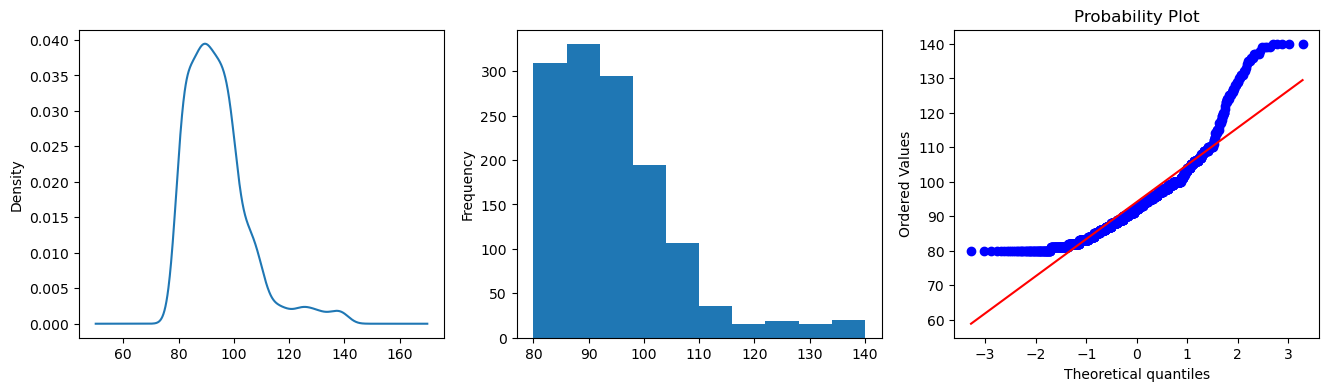

In [5]:
# Density, histogram and qq plot of bmi (Body mass index)

fig, axe = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

df_copy['bloodpressure'].plot.kde(ax=axe[0])
df_copy['bloodpressure'].plot.hist(bins=10,ax=axe[1])
stats.probplot(df_copy['bloodpressure'].dropna(), plot=axe[2])
plt.show()

<Axes: xlabel='bloodpressure'>

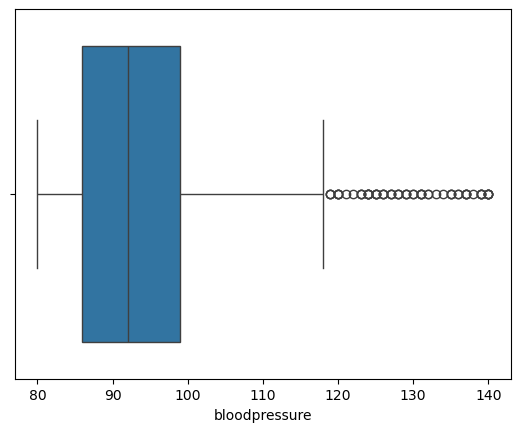

In [9]:
# Box plot of the bloodpressure
sns.boxplot(df_copy['bloodpressure'], orient='h')

In [11]:
# Calculating otal outliers poutliers percentage in bloodpressure column

IQR = np.percentile(df_copy['bloodpressure'].dropna(), 75) - np.percentile(df_copy['bloodpressure'].dropna(), 25) 
lower_range = np.percentile(df_copy['bloodpressure'].dropna(), 25) - 1.5*IQR
upper_range = np.percentile(df_copy['bloodpressure'].dropna(), 75) + 1.5*IQR
outliers_percentage = (df_copy[(df_copy['bloodpressure'] < lower_range) | (df_copy['bloodpressure'] > upper_range)].shape[0]/df_copy.shape[0])*100
outliers_percentage

4.626865671641791

In [13]:
# skewneness
df_copy['bloodpressure'].skew()

1.4835342102293079

In [15]:
# Kurtosis
df_copy['bloodpressure'].kurtosis()

2.890031852235991

In [17]:
# Shapiro wilk test for normality

stats.shapiro(df_copy['bloodpressure'])

ShapiroResult(statistic=0.8819853833647551, pvalue=9.68568652584248e-31)

Observations
* There are outliers, approx 4.62%
* it is not normally distributed at all
* No missing values

**Column Diabetic**

In [29]:
df_copy['diabetic'].value_counts()

diabetic
No     698
Yes    642
Name: count, dtype: int64

<Axes: ylabel='count'>

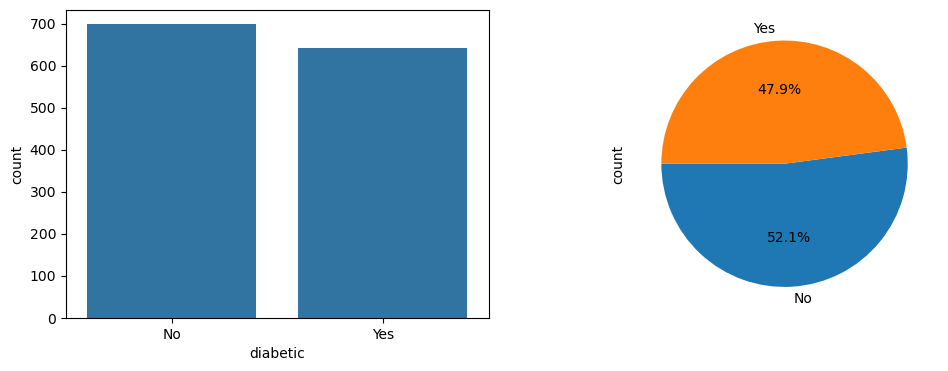

In [31]:
# Bar graph and pie chart of diabetic column
fig, axe = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.barplot(df_copy['diabetic'].value_counts(), ax=axe[0])
df_copy['diabetic'].value_counts().plot.pie(autopct='%1.1f%%', startangle=180)

Conclusion
* Almost balanced values for yes and no

**Column Smoker**

In [33]:
df_copy['smoker'].value_counts()

smoker
No     1066
Yes     274
Name: count, dtype: int64

<Axes: ylabel='count'>

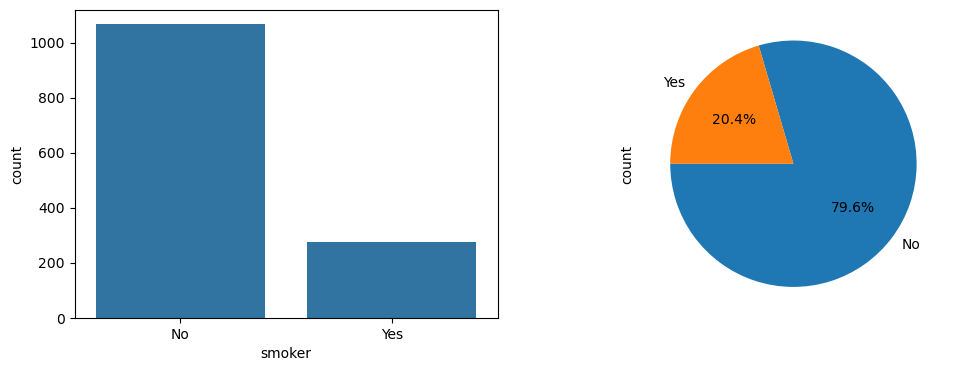

In [34]:
# Bar graph and pie chart of diabetic column
fig, axe = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.barplot(df_copy['smoker'].value_counts(), ax=axe[0])
df_copy['smoker'].value_counts().plot.pie(autopct='%1.1f%%', startangle=180)

## Bivariate Analysis

**Gender and claim column**

In [35]:
# descriptive summary 
df.groupby('gender')['claim'].describe().T


gender,female,male
count,662.000000,678.000000
mean,12569.578897,13919.790457
std,11128.703817,12969.700466
min,1607.510000,1121.870000
25%,4885.162500,4523.187500
50%,9412.965000,9333.015000
75%,14454.690000,18970.167500
max,63770.430000,62592.870000


LeveneResult(statistic=9.876152229366246, pvalue=0.0017110995319486206)

In [4]:
temp_df = df_copy[['gender', 'claim']]

In [47]:
# t-test to check if means are same

from scipy.stats import ttest_ind

male_claims = temp_df[temp_df['gender'] == 'male']['claim']
female_claims = temp_df[temp_df['gender'] == 'female']['claim']

_, p_val_levene = stats.levene(male_claims, female_claims)

if p_val_levene < 0.05:
    print('Can not apply t-test')
else:
    
    t_stat, p_value = ttest_ind(male_claims, female_claims)
    print(f'T-statistic: {t_stat}, P-value: {p_value}')


Can not apply t-test


In [49]:
# check for skewnwss
temp_df.groupby('gender').skew()

,claim
gender,
female,1.728944
male,1.338165


<Axes: xlabel='claim', ylabel='Count'>

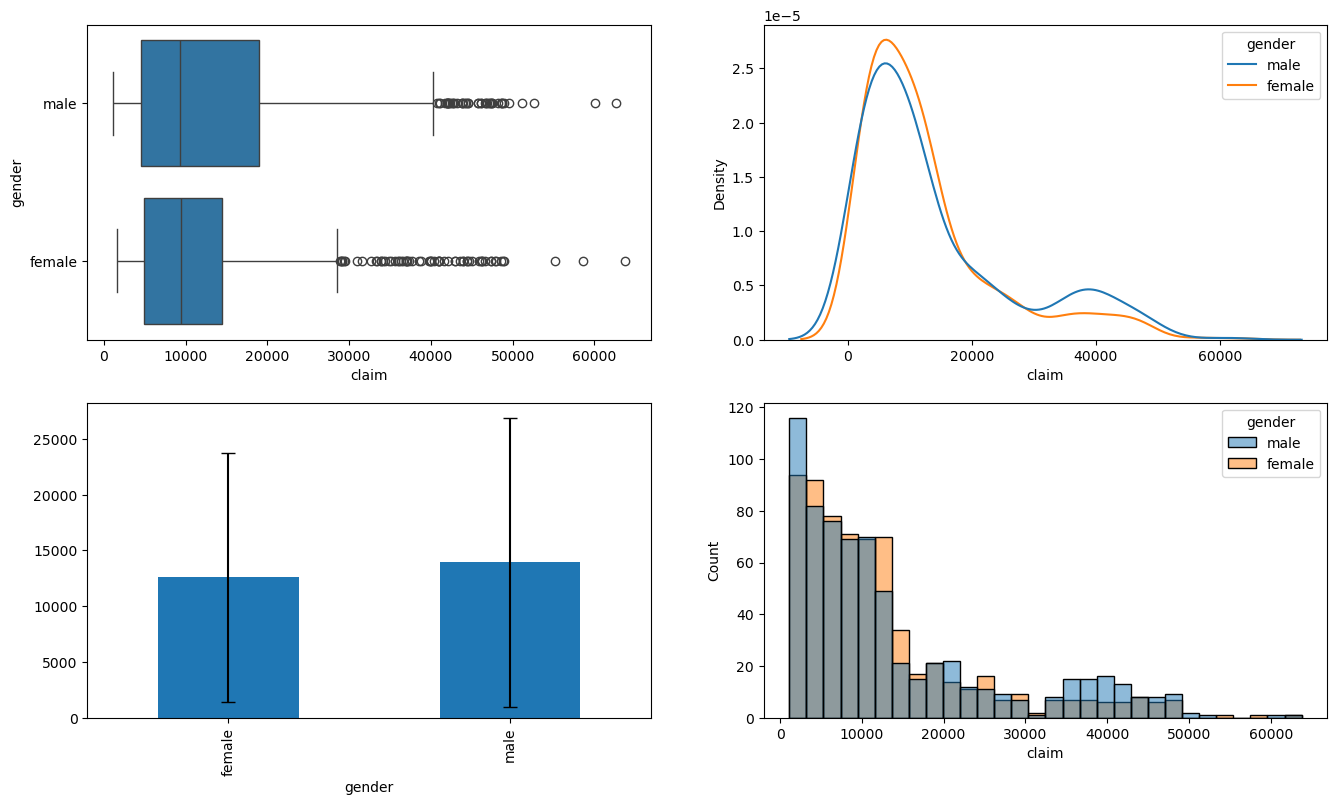

In [32]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 9))

sns.boxplot(data=temp_df, x='claim', y='gender', ax=ax[0, 0])
sns.kdeplot(data=temp_df, x='claim',  hue='gender', ax=ax[0, 1])

mean_claim = df.groupby('gender')['claim'].mean()
std_claim = df.groupby('gender')['claim'].std()

mean_claim.plot(kind='bar', yerr=std_claim, capsize=5, ax=ax[1, 0])
sns.histplot(data=temp_df, x='claim', hue='gender',ax=ax[1, 1])


In [51]:
# Since data is not normally distributed we use u-test
# U-test to check if there is significant difference between mean of male and female
stats.mannwhitneyu(male_claims, female_claims)

MannwhitneyuResult(statistic=226218.0, pvalue=0.7994275330353324)

Observations
* there are to many ouliers in male ans well as female
* there KDE plot is almost same
* MannwhitneyuResult(statistic=226218.0, pvalue=0.7994275330353324)
* mean and std are very close

Based on above observations it is reasonable to say that the gender column does't contribute much deciding claim value

**BMI and Claim column**

In [52]:
temp_df = df_copy[['bmi', 'claim']]

In [55]:
temp_df.corr()

,bmi,claim
bmi,1.000000,0.197401
claim,0.197401,1.000000


In [58]:
Regression Analysis between bmi and claim
X = df_copy['bmi']
y = df_copy['claim']
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     54.25
Date:                Sun, 01 Sep 2024   Prob (F-statistic):           3.07e-13
Time:                        00:40:45   Log-Likelihood:                -14473.
No. Observations:                1340   AIC:                         2.895e+04
Df Residuals:                    1338   BIC:                         2.896e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1247.5251   1661.874      0.751      0.4

<Axes: xlabel='bmi', ylabel='claim'>

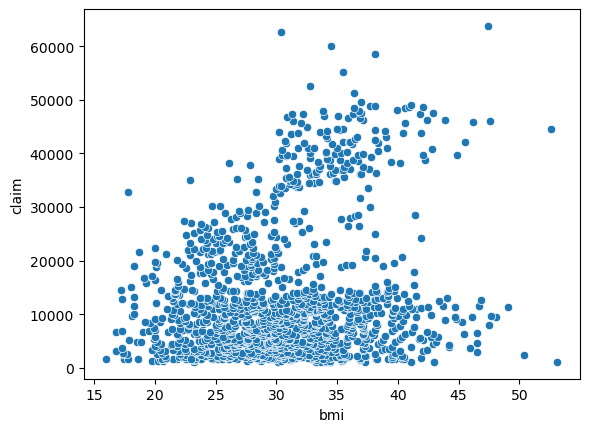

In [54]:
sns.scatterplot(x=temp_df['bmi'], y=temp_df['claim'])

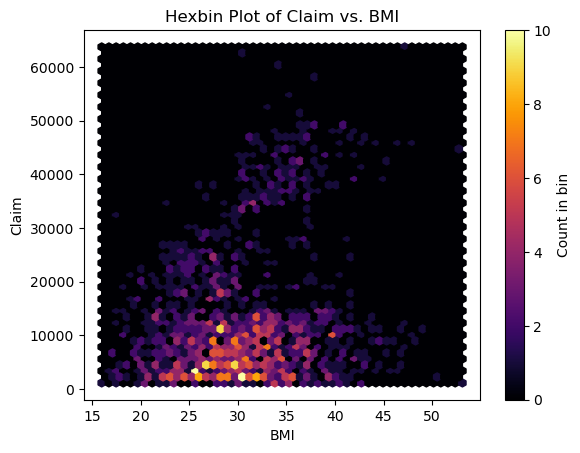

In [59]:
plt.hexbin(df['bmi'], df['claim'], gridsize=50, cmap='inferno')
plt.colorbar(label='Count in bin')
plt.title('Hexbin Plot of Claim vs. BMI')
plt.xlabel('BMI')
plt.ylabel('Claim')
plt.show()


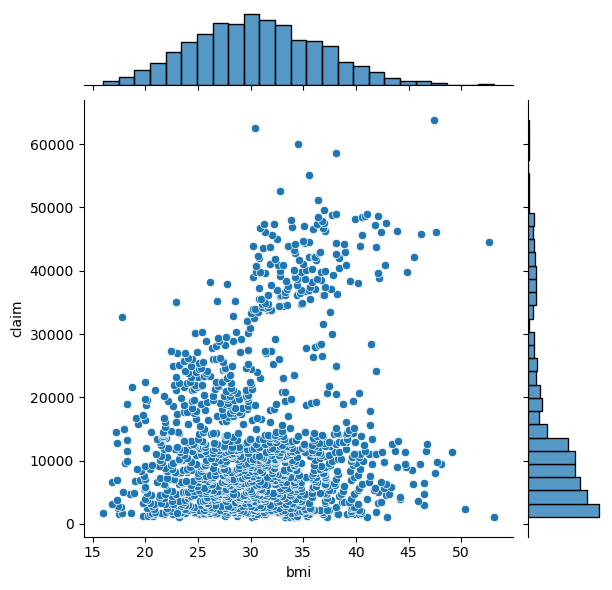

In [60]:
sns.jointplot(x='bmi', y='claim', data=df, kind='scatter')
plt.show()


In [61]:
from scipy.stats import spearmanr

spearman_corr, p_value = spearmanr(df['bmi'], df['claim'])
print(f'Spearman Rank Correlation: {spearman_corr}, P-value: {p_value}')

# Spearman Rank Correlation: 0.11849097356125443, P-value: 1.3690810857031794e-05

Spearman Rank Correlation: 0.11849097356125443, P-value: 1.3690810857031794e-05


Observations
* There ia very weak positive correlation between bmi and claim
* There are too many outliers present that are disorting the linear relationship